# Final Project - Basics of deep learning
Hello dear students,<br> This is the template notebook. Please copy it into your drive.

---
<br>

### Name and ID:
Student 1: Oron Pariente 315826990
<br>
Student 2: Idan Zafrani 316061100

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/20733/logos/header.png?t=2020-05-14-08-44-45">

# Utils

## Import Libraries

In [9]:
%%capture
import json
import torch
import pickle
import torch.nn as nn
import torch.optim as optim
import torchvision
import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import load_img
import tensorflow_datasets as tfds
from keras.preprocessing import image
from torchvision import transforms, models
# !gdown --id 1DS_5kLbzYYzMWtp1WP3x_hxtRBhroJID

## Dataset
Cars196 - 196 different classes of vehicles

### Download Data

In [2]:
file = open('train_data.pkl', 'rb')
train_data = pickle.load(file)

In [3]:
label_dic = pd.read_csv('labels_dic.csv', header=None, dtype={0: str}).set_index(0).squeeze().to_dict()

### Function - Plot Single Example
This function receives an image and a label and it will display it on a plot

In [4]:
def plot_single_example(image, label, label_dic=label_dic):
  car_model_by_label = label_dic[str(label)]
  plt.title(f'Image Label: {car_model_by_label} ({label})')
  plt.imshow(image)

# Data Preprocessing

### Split Dataset
Train set contains 8041 examples<br>
Test set contains 8144 examples<br>
**It is allowed to change the ratio between the data sets.**


### Example
Random example from the data set

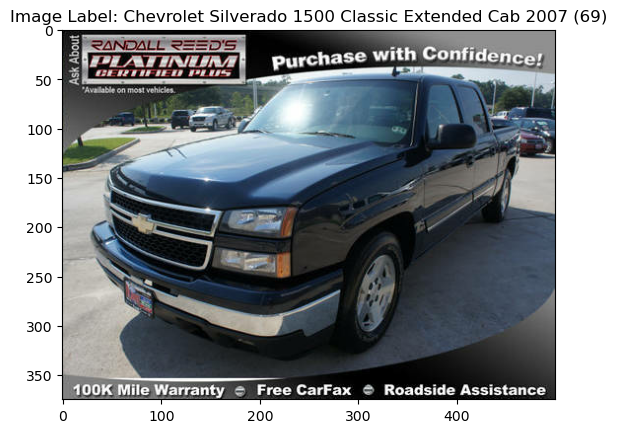

In [6]:
image, label = train_data[0]
plot_single_example(image, label)

# Transfer Learning

## Hyperparameters

In [13]:
loss_function = nn.CrossEntropyLoss()
n_of_epochs = 10
learning_rate = 0.01


In [10]:
# Load the pre-trained model from torchvision.models
model = models.resnet18(pretrained=True)

# Freeze all layers of the pre-trained model
for param in model.parameters():
    param.requiresGrad = False

# Replace the last fully connected layer
n_inputs = model.fc.in_features
model.fc = nn.Linear(n_inputs, 196)

# Move the model to the GPU
# model.cuda()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

# Define the data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

/Users/pariente/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/pariente/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/pariente/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [15]:

# Load the ImageNet dataset
# dataset = torchvision.datasets.ImageFolder(train_data, data_transforms)

# Define the data loaders
dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)

# Train the model
for epoch in tqdm.tqdm_notebook(range(n_of_epochs)):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        logits = model(inputs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

/var/folders/m7/6m7zy7s95jvf7m35kh5fg8nw0000gn/T/ipykernel_32667/2865445976.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm.tqdm_notebook(range(n_of_epochs)):


  0%|          | 0/10 [00:00<?, ?it/s]

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/pariente/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/pariente/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "/Users/pariente/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/Users/pariente/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 143, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/Users/pariente/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 143, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/Users/pariente/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 120, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/Users/pariente/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 163, in collate_tensor_fn
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [408, 544, 3] at entry 0 and [600, 600, 3] at entry 1
